In [9]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
sys.path.insert(1, oj(sys.path[0], '..', 'vision_fit'))  # insert parent path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import math
# plt.style.use('dark_background')
from collections import OrderedDict
from sklearn import preprocessing

import torch
from torch.autograd import Variable
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# from vision_fit import data
import viz_weights
from process_results import process_results

%matplotlib inline
%load_ext autoreload
%autoreload 2

import style
cb = '#008fd5'
cr = '#fc4f30'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
style.set_style()

# load results from a directory

In [11]:
# depending on how much is saved, this may take a while
# sweep2 is pretty big
# freeze_last_small freezes last lay
# freeze_last also freezes last lay
out_dir = '/scratch/users/vision/yu_dl/raaz.rsk/linear/sin'
fnames = sorted([fname for fname in os.listdir(out_dir) \
                 if not fname.startswith('weights')])

results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in fnames
                if not fname.startswith('weights') and not fname.startswith('idx')]
results = pd.concat(results_list, axis=1).T.infer_objects()

its, ts, results = process_results(results)
print(results.shape)

(278, 101)


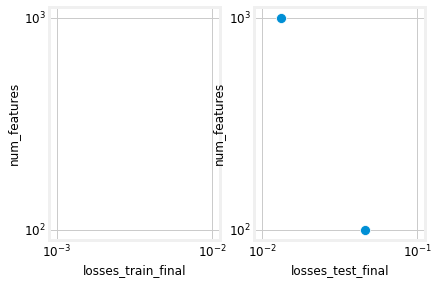

In [12]:
r = results
# r = r[r.num_points > r.batch_size]
# r = r[r.losses_test_final < 100]
R, C = 1, 2

plt.subplot(R, C, 1)
sns.scatterplot(r.losses_train_final, r.num_features)
plt.yscale('log')
plt.xscale('log')

plt.subplot(R, C, 2)
sns.scatterplot(r.losses_test_final, r.num_features)
# plt.xlabel('final test loss')
# plt.ylabel('num points')
plt.yscale('log')
plt.xscale('log')
plt.show()

# track things over time
variables of interest: num_points, num_features, w_type, hidden_size

variables to condiiton on: lr, optimizer

In [ ]:
r = results
r = r[r.losses_test_final < 0.01]
# r = r[r.num_features == 100]
# r = r[r.lr == 0.1]
r = r[r.w_type == 'ones']
# r = r[r.num_points == 1000]
# r = r[r.optimizer == 'sgd']
sns.scatterplot(r.hidden_size, r.losses_test_final, hue=r.num_features)
# plt.yscale('log')
plt.xscale('log')
plt.ylim((0.0003, 0.001))
plt.show()

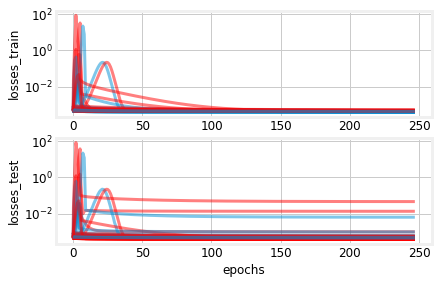

In [7]:
r = results
r = r[r.losses_train_final < 1e0]
r = r[r.optimizer == 'sgd']

R, C = 2, 1

vals = ['losses_train', 'losses_test']


# well-behaved
for _, row in r.iterrows():

    for i, val in enumerate(vals):
        plt.subplot(R, C, i+1)
        plt.semilogy(row.its[:row[val].size], row[val], color='red' if row.w_type=='ones' else cb, alpha=0.5)
        plt.xlabel('epochs')
        plt.ylabel(val)
#         plt.xlim((0, xlim))

## plot these things against one another
**overmemorization in the beginning can still maintain high train acc but suffers on test acc**

In [ ]:
rm = results[(results.seed == 0) * (results.dset == 'mnist')]
# rm = results[(results.dset == 'mnist') * (results.max_test_acc >= 0.8)]
plt.figure(figsize=(12, 4))
R, C = 1, 1
for _, row in rm.iterrows():

    plt.subplot(R, C, 1)
    idxs = [True if v in ts else False for v in row.its[:row.accs_train.size]]
    accs_train = row.accs_train[idxs]
    plt.plot(accs_train, row.corr0, color='red' if row.optimizer=='adam' else cb, alpha=0.1)
#     plt.scatter(accs_train, row.corr0, c=accs_train) #color='red' if row.optimizer=='adam' else cb, alpha=0.1)    
#     plt.plot([accs_train[0], accs_train[1], accs_train[-1]], [row.corr0[0], row.corr0[1], row.corr0[-1]]) #, color='red' if row.optimizer=='adam' else cb, alpha=0.1)    
#     plt.plot([accs_train[3], accs_train[-1]], [row.corr0[3], row.corr0[-1]], alpha=0.5) #, color='red' if row.optimizer=='adam' else cb, alpha=0.1)        
    plt.xlabel('train acc')
    plt.ylabel('max_corr')
    
    '''
    
    plt.plot(row.its[:row.accs_train.size], row.accs_train, 
    plt.xlabel('epochs')
    plt.ylabel('max_corr')
    plt.xlim((0, 20))
    
    plt.subplot(R, C, 2)
    plt.title('max')
    
    plt.plot(ts, row.corr0, color='red' if row.optimizer=='adam' else cb, alpha=0.5)
    plt.xlabel('epochs')
    plt.ylabel('max_corr')
    plt.xlim((0, 20))
    '''
    